<a href="https://colab.research.google.com/github/marcojr93/i2a2_desafios_projetos/blob/main/I2A2%20Desafio%201%20-%20Analise%20de%20sensores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 1 - I2A2 - ABDI

**As regras do jogo**

A planilha contém 17 sensores e 8 equipamentos.

*   Um dos equipamentos está com defeito.
*   A tarefa de vocês é descobrir qual é o equipamento defeituoso

Importante, quero o equipamento, e não o sensor que está alarmando o defeito

# Preparação do dataset

In [1]:
# Primeiramente é necessário importar as bilbiotecas que serão utilizadas ao longo da análise

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
     

Os dados mostrados na tabela abaixo foram disponibilizados via planilha em Excel e com eles, faremos nossa análise

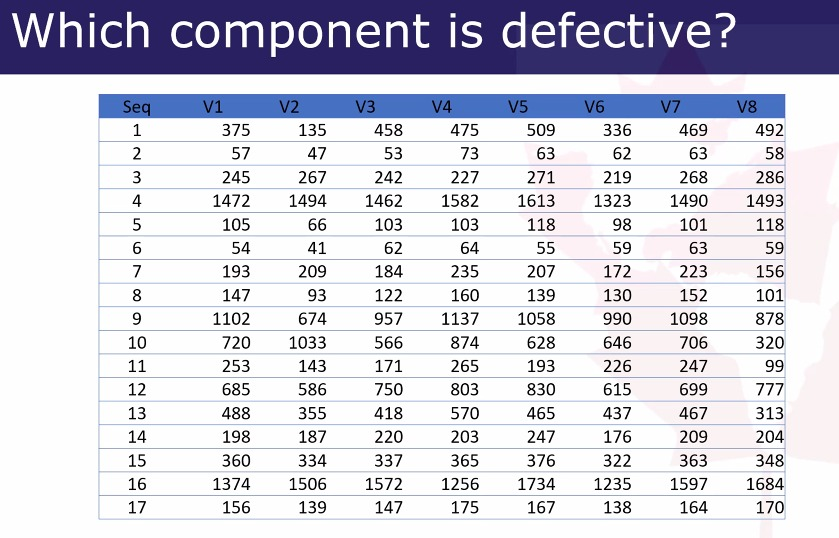

In [2]:
# Carregando o dataset em Excel

df = pd.read_excel('defective_equipment.xlsx')
display(df)

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
0,1,375,135,458,475,509,336,469,492
1,2,57,47,53,73,63,62,63,58
2,3,245,267,242,227,271,219,268,286
3,4,1472,1494,1462,1582,1613,1323,1490,1493
4,5,105,66,103,103,118,98,101,118
5,6,54,41,62,64,55,59,63,59
6,7,193,209,184,235,207,172,223,156
7,8,147,93,122,160,139,130,152,101
8,9,1102,674,957,1137,1058,990,1098,878
9,10,720,1033,566,874,628,646,706,320


In [3]:
# Para melhor entendimento da planilha, vamos renomear a linha 1, que corresponde aos equipamentos. Assim, cada "V" corresponde a um equipamento e serão abreviados de Eq

# Para renomear todos de uma forma mais rápida, utilizaremos a função rename do Pandas, criando uma lista chamada Mapa para realizar a mudança de uma forma mais rápida

mapa = {
    "V1" : "Eq1",
    "V2" : "Eq2",
    "V3" : "Eq3",
    "V4" : "Eq4",
    "V5" : "Eq5",
    "V6" : "Eq6",
    "V7" : "Eq7",
    "V8" : "Eq8"
}

df = df.rename(columns = mapa)


In [4]:
# Verificando como ficou o dataset após modificação

display(df)

,Seq,Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8
0,1,375,135,458,475,509,336,469,492
1,2,57,47,53,73,63,62,63,58
2,3,245,267,242,227,271,219,268,286
3,4,1472,1494,1462,1582,1613,1323,1490,1493
4,5,105,66,103,103,118,98,101,118
5,6,54,41,62,64,55,59,63,59
6,7,193,209,184,235,207,172,223,156
7,8,147,93,122,160,139,130,152,101
8,9,1102,674,957,1137,1058,990,1098,878
9,10,720,1033,566,874,628,646,706,320


In [5]:
# A coluna "Seq" não vai influenciar na análise, iremos excluir do dataset

df = df.drop(['Seq'], axis =1)
display(df)

,Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8
0,375,135,458,475,509,336,469,492
1,57,47,53,73,63,62,63,58
2,245,267,242,227,271,219,268,286
3,1472,1494,1462,1582,1613,1323,1490,1493
4,105,66,103,103,118,98,101,118
5,54,41,62,64,55,59,63,59
6,193,209,184,235,207,172,223,156
7,147,93,122,160,139,130,152,101
8,1102,674,957,1137,1058,990,1098,878
9,720,1033,566,874,628,646,706,320


Após a preparação do dataset, podemos iniciar nossas primeiras análises, nessa etapa, é importante entender o formato dos dados, padrões e avaliar qual melhor abordagem para respondermos a perguntar: "Qual o equipamento que está com defeito"

# Análise exploratória de dados

In [24]:
# Podemos ter uma visão geral dos dados através da função describe do pandas, 
# que # realiza uma análise de estatística descritiva, importante para
# darmos os primeiros passos no entendimento do dataset.

df.describe()

,Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,469.647059,429.941176,460.235294,503.941176,510.176471,422.588235,492.882353,444.470588
std,452.701466,479.896014,469.595907,463.859282,517.552562,405.843267,480.721448,491.302748
min,54.000000,41.000000,53.000000,64.000000,55.000000,59.000000,63.000000,58.000000
25%,156.000000,135.000000,147.000000,175.000000,167.000000,138.000000,164.000000,118.000000
50%,253.000000,209.000000,242.000000,265.000000,271.000000,226.000000,268.000000,286.000000
75%,685.000000,586.000000,566.000000,803.000000,628.000000,615.000000,699.000000,492.000000
max,1472.000000,1506.000000,1572.000000,1582.000000,1734.000000,1323.000000,1597.000000,1684.000000


In [ ]:
# Vemos que os dados possuem vários outliers e que a distribuição de Q4 chama 
# atenção em relação a quantidade de dados no Q3.

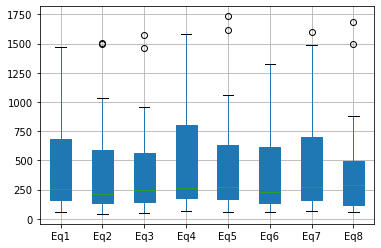

In [25]:
# Uma outra forma de interpretar essas informações é transformando em boxplots para 
# ajudar na visuzaliação do conjunto como todo e principalmente na identificação
# de outliers no dataset.

boxplot = df.boxplot(column=['Eq1', 'Eq2', 'Eq3', 'Eq4', 'Eq5', 'Eq6', 'Eq7', 'Eq8'], patch_artist=True)


Dataset pequenos podem sofrer grande influência da presença de outliers, dentre as abordagens que podem ser utilizadas mediante à essa situação, faremos a remoção dos outliers.

Um outro ponto importante, se tratando de um conjunto de dados relativos à um equipamento, podemos entender que os outliers são situações pontuais inerentes à operação do equipamento que podem acontecer por alterações de processo, aumento de carga ou parametros de operação que não caracterizam necessariamento um defeito. 

# Limpeza dos dados

In [29]:
# Para remoção dos outliers, será criado um novo dataframe com nome "df1"

df1 = df

In [30]:
# Esse método envolve o cálculo do intervalo interquartil (IQR) para o conjunto
# de dados e a remoção de quaisquer pontos de dados que estejam fora do
# intervalo definido pelo primeiro e terceiro quartis.

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


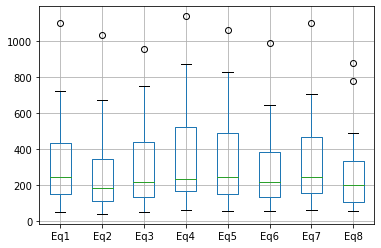

In [18]:
boxplot = df1.boxplot(column=['Eq1', 'Eq2', 'Eq3', 'Eq4', 'Eq5', 'Eq6', 'Eq7', 'Eq8']) 

Finalizando o tratamento dos dados, podemos fazer uma análise gráfica do dataset e entender melhor como os valores se distribuem no tempo.

# Análise gráfica

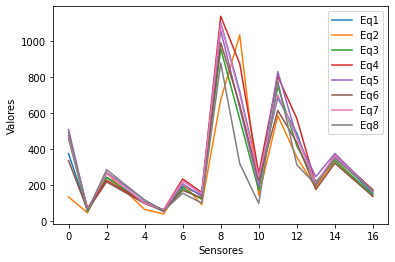

In [38]:
# O gráfico de linhas pode ajudar a entender se existe um padrão
# de operação dos equipamentos e qual equipamento pode estar
# com tendência à falha.

for i in df1.columns:
    plt.plot(df1[i], label=str(i))
    plt.legend()
plt.xlabel('Sensores')
plt.ylabel('Valores')
plt.show()

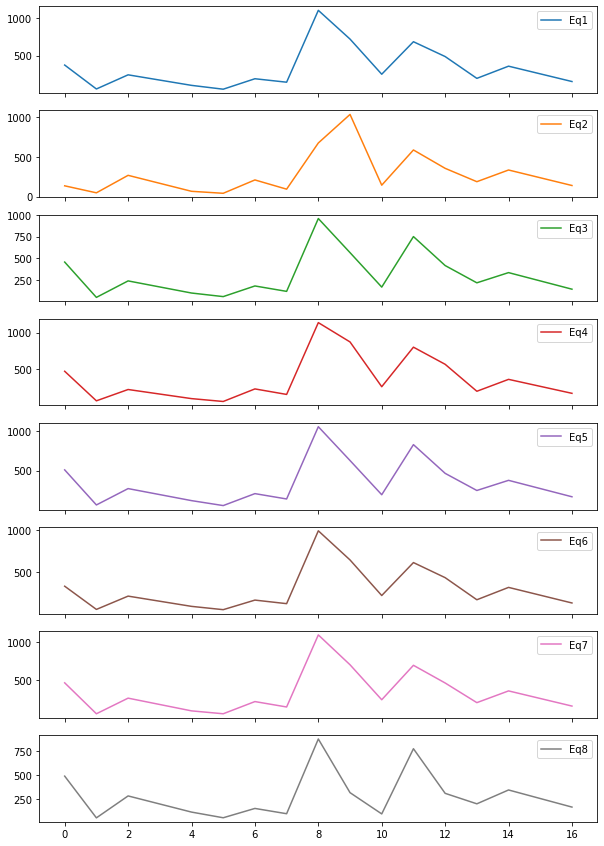

In [36]:
# A principio, o Equipamento 2, aparenta estar operando fora
# dos padrões dos demais equipamentos. Podemos melhorar a visualização
# plotando os gráficos separadamente

df1.plot(subplots =True, sharex = True, figsize = (10,15));

Após a plotagem, da para destacar a região dos dados coletados pelos sensores 7, 8, 9 e 10, onde há a maior diferença de comportamento do Equipamento 2 para os demais.

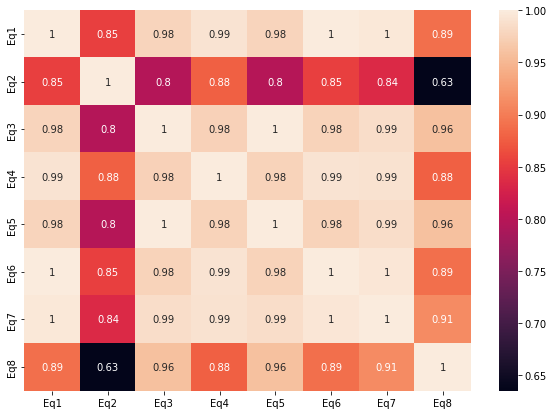

In [37]:
# Através de uma matriz de correlação, podemos também visualizar
# a interação e o grau de influência entre si.

f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(df1.corr(), annot = True)
plt.show()

O Equipamento 2 possui os menores valores de correlação entre todos os equipamentos, indicando que ele opera distante do padrão, portanto, é o nosso equipamento defeituoso.

# Considerações finais

Considerando que todos os equipamentos operam em mesma condição e com características construtivas semelhantes, é importante observar valores que indicam a operação fora de um padrão relacionado aos demais.

Esse valores que destoam do comum, são destacados no Equipamento 2 (ou V2), o que nos leva a conclusão de que ele é o equipamento defeituoso

